In [151]:
%pylab inline

import nengolib
from nengolib.signal import s
import nengo


def maxabsimpulse(sys, dt, T=0.5, high=150, seed=0, var=0):
    with nengolib.Network() as model:
        #stim = nengo.Node(output=nengo.processes.WhiteNoise())
        stim_2 = nengo.Node(output=nengo.processes.WhiteNoise(seed=seed, scale=False, dist=nengo.dists.Gaussian(0, (0.5)*var)))
        stim = nengo.Node(output=nengo.processes.WhiteSignal(T, high=high, seed=seed))
        output = nengo.Node(size_in=1)
        p = nengo.Probe(stim, synapse=sys)
        p_2 = nengo.Probe(stim_2, synapse=None)

    sim = nengo.Simulator(model, dt=dt)
    sim.run(T, progress_bar=False)
    return max(abs(sim.data[p])), max(abs(sim.data[p_2])), sim.data[p]
    #return max(abs(np.diff(sim.data[p], axis=0)/dt))

data = []
#for dt in np.linspace(0.0001, 0.002, 20):
#    r = maxabsimpulse(nengolib.Lowpass(0.01), dt)
#    data.append(r)

check = []

dt = 0.0005
high = 150

for tau in np.linspace(0.002, 0.01, 20):
    sys = s*nengolib.Lowpass(tau)
    var = abs(sys.evaluate(high))
    
    #freqs = np.linspace(0, high, 100)
    #check.append(abs(np.mean(sys.evaluate(freqs))))
    
    # TODO: http://math.stackexchange.com/questions/473229/expected-value-for-maximum-of-n-normal-random-variable
    
    r, r2, y = maxabsimpulse(sys, dt, high=high, T=2.0, var=var)
    data.append(r)
    
    check.append(r2)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


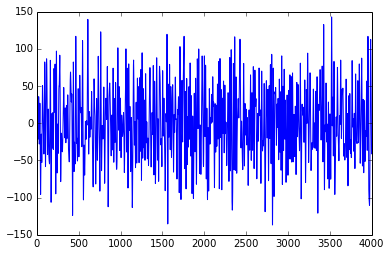

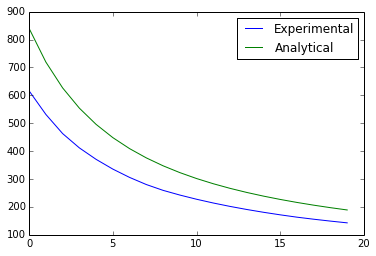

In [152]:
figure()
plot(y)
show()

figure()
plot(data, label='Experimental')
plot(check, label='Analytical')
legend()
#xscale('log')
show()


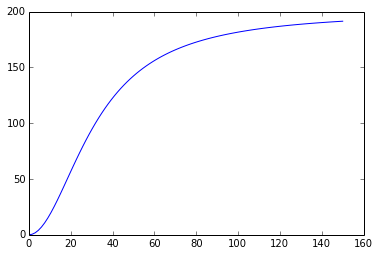

In [127]:
tau = 0.005
sys = s*nengolib.Lowpass(tau)
freqs = np.linspace(0, high, 100)

figure()
plot(freqs, sys.evaluate(freqs))
show()